# <div align='center'>K-Nearest Neighbors</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
class K_Nearest_Neighbors():
    
    def __init__(self,X,y,k,d_type):
        
        self.X = X
        self.y = y.reshape(-1,1)
        self.K = k
        self.d_type = d_type
        
    def distance_Metric(self,test_data):
        
        distance = 0
        
        if(self.d_type == 'euclidean_dist'):
            
            # Alternate way to implement: np.linalg.norm((self.X - test_data), axis=1).reshape(-1,1)
            distance = np.sqrt(np.sum(np.square(self.X - test_data), axis=1)).reshape(-1,1)
            
        elif(self.d_type == 'manhattan_dist'):
            
            distance = np.sum(np.abs(self.X - test_data), axis=1).reshape(-1,1)
        
        return distance
        
    def get_k_neighbors(self,test_data):
        
        # Calculate the distance
        distance = self.distance_Metric(test_data)
            
        # Horizontally stack the distance and self.y array
        dataframe = np.hstack((distance,self.y))
            
        # Convert to a pandas dataframe 
        dataframe = pd.DataFrame(dataframe,columns=["Distance","y_hat"])
            
        # Sort the dataframe based on distance
        dataframe = dataframe.sort_values('Distance')
            
        # get the k closest neighbors
        k_neighbors = dataframe.head(self.K)
            
        return k_neighbors
            
    def predict(self,X_test):
        
        # Find the k closest neighbors
        k_neighbors = self.get_k_neighbors(X_test)
        
        return k_neighbors["y_hat"].mode().tolist()[0]
    
    def calc_Accuracy(self,X_test,y_test):
        
        n_samples = y_test.shape[0]
        
        y_test = y_test.reshape(-1,1)
        y_hat = []
        
        for row in X_test:
    
            test_data = np.array([row]*self.X.shape[0]).reshape(self.X.shape)
            y_hat.append(self.predict(test_data))
            
        y_hat = np.array(y_hat).reshape(-1,1)
        
        accuracy = np.sum(y_hat == y_test)/n_samples
        
        return accuracy

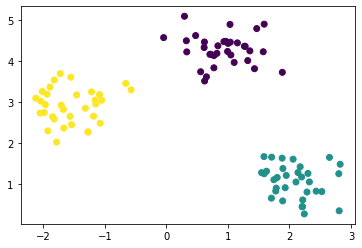

In [7]:
# Dataset from sklearn
Data_X, Data_y = make_blobs(n_samples=100,centers=3, n_features=2,cluster_std=0.4,random_state=0)

split_ratio = 75

# Training Set
X_train, y_train = Data_X[:split_ratio,:],Data_y[:split_ratio]

# Testing Set
X_test, y_test = Data_X[split_ratio:,:],Data_y[split_ratio:]


plt.scatter(Data_X[:,0],Data_X[:,1],c=Data_y)

In [8]:
clf = K_Nearest_Neighbors(X_train,y_train,5,'euclidean_dist')
clf.calc_Accuracy(X_test,y_test)

1.0